## Setup

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy import stats

In [2]:
plt.style.use('ggplot')

## 3. Data preprocessing 

In [10]:
apple = pd.read_csv(r'C:\Users\12436\Desktop\BrainStation\Capstone project\capstone-Leoyuyuyu\data\apple_after_eda.csv', index_col=0)

,Open,High,Low,Close,Adj Close,Volume,Return,Target
1980-12-13,0.128348,0.128906,0.128348,0.128348,0.099058,469033600.0,0.000000,0
1980-12-14,0.128348,0.128906,0.128348,0.128348,0.099058,469033600.0,0.000000,0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800.0,-0.052171,0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086998,105728000.0,-0.073398,0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600.0,0.024751,1


In [86]:
apple['Return_tomo']=apple['Return'].shift(-1)
apple['Target_tomo']= np.where(apple['Return_tomo']> 0, 1,0)
apple = apple.dropna(axis=0)
display(apple)

,Open,High,Low,Close,Adj Close,Volume,Return,Target,Return_tomo,Target_tomo
1980-12-13,0.128348,0.128906,0.128348,0.128348,0.099058,469033600.0,0.000000,0,0.000000,0
1980-12-14,0.128348,0.128906,0.128348,0.128348,0.099058,469033600.0,0.000000,0,-0.052171,0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800.0,-0.052171,0,-0.073398,0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086998,105728000.0,-0.073398,0,0.024751,1
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600.0,0.024751,1,0.028992,1
...,...,...,...,...,...,...,...,...,...,...
2024-05-18,189.509995,190.809998,189.179993,189.869995,189.869995,41282900.0,0.000000,0,0.000000,0
2024-05-19,189.509995,190.809998,189.179993,189.869995,189.869995,41282900.0,0.000000,0,0.006162,1
2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300.0,0.006162,1,0.006857,1
2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400.0,0.006857,1,-0.007538,0


### 3.1 Change binary variables to binary numerical values - Not necessary in this data set 

### 3.2 Get dummies - Not necessary in this data set

### 3.3 Data relation check

#### 3.3.1 for OLS

In [93]:
# Check the relation to the Target column 

display(apple.corr()['Return_tomo'].drop(['Return_tomo', 'Target_tomo'], axis=0).to_frame().style.background_gradient(cmap='coolwarm'))

,Return_tomo
Open,-0.003673
High,-0.003631
Low,-0.003542
Close,-0.003731
Adj Close,-0.003693
Volume,0.006505
Return,-0.003389
Target,0.003954


In [88]:
# This part can be writen as a function to check the correlation. 
X_OLS = apple.drop(columns=['Target_tomo', 'Return_tomo'], axis = 1)
y_OLS = apple['Return_tomo']
# Check the pearson-test
p_corr = []
p_vals = []

for cols in X_OLS.columns:
    pearson_corr, p_val = stats.pearsonr(y_OLS, X_OLS[cols])
    p_corr.append(pearson_corr)
    p_vals.append(p_val)

pearson_and_P = pd.DataFrame(index=X_OLS.columns)
pearson_and_P['Pearson correlation to Target'] = p_corr
pearson_and_P['P values'] = p_vals

pearson_and_P['significance level'] = np.where(pearson_and_P['P values']>=0.05, 1, 0)

display(pearson_and_P)

,Pearson correlation to Target,P values,significance level
Open,-0.003673,0.643588,1
High,-0.003631,0.647443,1
Low,-0.003542,0.655517,1
Close,-0.003731,0.638423,1
Adj Close,-0.003693,0.641824,1
Volume,0.006505,0.412616,1
Return,-0.003389,0.669487,1
Target,0.003954,0.618466,1


It seems all the existing features are not ideal to be the predictor. 

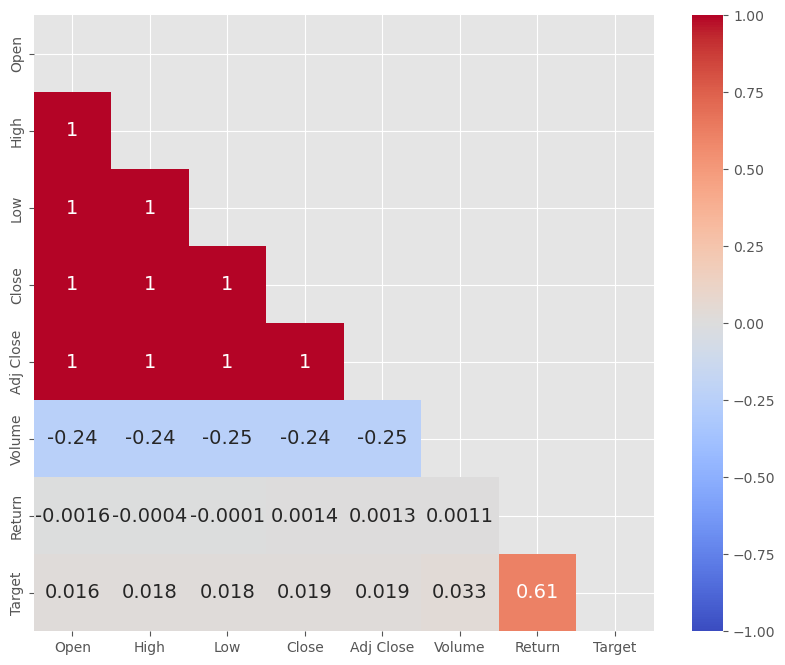

In [96]:
# Check the colinearity*

corr_matirx = X_OLS.corr().round(4)
mask_matrix = np.triu(corr_matirx)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matirx, cmap='coolwarm',annot=True, annot_kws={'size': 14}, mask=mask_matrix, vmax=1, vmin=-1)
plt.show()

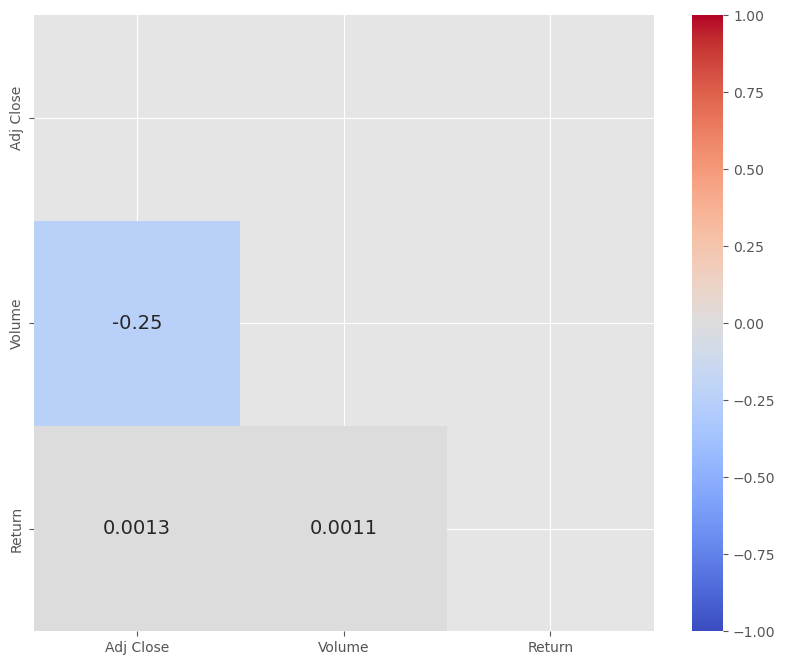

In [97]:
# Drop strongly correlated variables:

X1_OLS= X_OLS.drop(columns=['Open', 'Close', 'High', 'Low', 'Target'], axis=1)
updated_corr_matrix = X1_OLS.corr()
updated_mask = np.triu(updated_corr_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(updated_corr_matrix, mask=updated_mask, annot=True, annot_kws={'size': 14}, cmap='coolwarm', vmax = 1, vmin=-1)
plt.show()

In [98]:
# Check the correlation in population:

print(stats.pearsonr(X1_OLS['Volume'], X1_OLS['Return']))
print(stats.pearsonr(X1_OLS['Adj Close'], X1_OLS['Return']))
print(stats.pearsonr(X1_OLS['Adj Close'], X1_OLS['Volume']))

PearsonRResult(statistic=0.0010796464112900928, pvalue=0.8918321833239667)
PearsonRResult(statistic=0.0012846293860132377, pvalue=0.8714596243062689)
PearsonRResult(statistic=-0.2463229598754336, pvalue=5.912360992834337e-218)


In [99]:
# Check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
X1_OLS_withconst = sm.add_constant(X1_OLS)
VIF_df = [variance_inflation_factor(X1_OLS_withconst.values, i) for i in range(X1_OLS_withconst.shape[1])]
VIF_df = pd.DataFrame(index=X1_OLS_withconst.columns, data = VIF_df, columns=['VIF'])
display(VIF_df)

,VIF
const,2.407480
Adj Close,1.064597
Volume,1.064596
Return,1.000004


The VIF check has passed. 

In [104]:
display(X1_OLS)   # Three features: Adj CLose, Volume, Return will be used to predict the next day return value
display(y_OLS)    # Next day return 

,Adj Close,Volume,Return
1980-12-13,0.099058,469033600.0,0.000000
1980-12-14,0.099058,469033600.0,0.000000
1980-12-15,0.093890,175884800.0,-0.052171
1980-12-16,0.086998,105728000.0,-0.073398
1980-12-17,0.089152,86441600.0,0.024751
...,...,...,...
2024-05-18,189.869995,41282900.0,0.000000
2024-05-19,189.869995,41282900.0,0.000000
2024-05-20,191.039993,44361300.0,0.006162
2024-05-21,192.350006,42309400.0,0.006857


1980-12-13    0.000000
1980-12-14   -0.052171
1980-12-15   -0.073398
1980-12-16    0.024751
1980-12-17    0.028992
                ...   
2024-05-18    0.000000
2024-05-19    0.006162
2024-05-20    0.006857
2024-05-21   -0.007538
2024-05-22   -0.021058
Name: Return_tomo, Length: 15867, dtype: float64

In [107]:
OLS_df = apple.drop(columns = ['Open', 'High', 'Low', 'Close', 'Target', 'Target_tomo'])
OLS_df.to_csv(r'C:\Users\12436\Desktop\BrainStation\Capstone project\capstone-Leoyuyuyu\data\OLS_df.csv')

### 3.3.2 For logit

In [113]:
apple.corr()['Target_tomo'].to_frame().drop(['Return_tomo', 'Target_tomo'], axis = 0).style.background_gradient(cmap='coolwarm')

,Target_tomo
Open,0.014522
High,0.014641
Low,0.014613
Close,0.014543
Adj Close,0.014087
Volume,0.020082
Return,0.002930
Target,0.071593


In [114]:
X_Logit = apple.drop(columns= ['Return_tomo', 'Target_tomo'], axis=1)
y_Logit = apple['Target_tomo']

display(X_Logit)
display(y_Logit)


,Open,High,Low,Close,Adj Close,Volume,Return,Target
1980-12-13,0.128348,0.128906,0.128348,0.128348,0.099058,469033600.0,0.000000,0
1980-12-14,0.128348,0.128906,0.128348,0.128348,0.099058,469033600.0,0.000000,0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800.0,-0.052171,0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086998,105728000.0,-0.073398,0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600.0,0.024751,1
...,...,...,...,...,...,...,...,...
2024-05-18,189.509995,190.809998,189.179993,189.869995,189.869995,41282900.0,0.000000,0
2024-05-19,189.509995,190.809998,189.179993,189.869995,189.869995,41282900.0,0.000000,0
2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300.0,0.006162,1
2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400.0,0.006857,1


1980-12-13    0
1980-12-14    0
1980-12-15    0
1980-12-16    1
1980-12-17    1
             ..
2024-05-18    0
2024-05-19    1
2024-05-20    1
2024-05-21    0
2024-05-22    0
Name: Target_tomo, Length: 15867, dtype: int32

In [121]:
# Check P-corr and P-value

p_corr_logit = []
P_value_logit = []

for cols in X_Logit.columns: 
    p_corr, p_val = stats.pearsonr(y_Logit, X_Logit[cols])
    p_corr_logit.append(p_corr)
    P_value_logit.append(p_val)

pearson_and_P_Logit = pd.DataFrame(data= p_corr_logit, index = X_Logit.columns, columns=['correlation'])
pearson_and_P_Logit['P-Value'] = P_value_logit
pearson_and_P_Logit['significant level'] = np.where(pearson_and_P_Logit['P-Value']>0.05, 1, 0)
pearson_and_P_Logit

,correlation,P-Value,significant level
Open,0.014522,6.737202e-02,1
High,0.014641,6.515894e-02,1
Low,0.014613,6.567576e-02,1
Close,0.014543,6.697638e-02,1
Adj Close,0.014087,7.600505e-02,1
Volume,0.020082,1.141637e-02,0
Return,0.002930,7.121327e-01,1
Target,0.071593,1.732727e-19,0


Although the P-values are smaller, but still bigger than the threshold 0.05, we will keep going on with only drop the Return column to see what will happen in the end.


In [ ]:
X_Logit = X_Logit.drop(columns=['Return'], axis = 1)

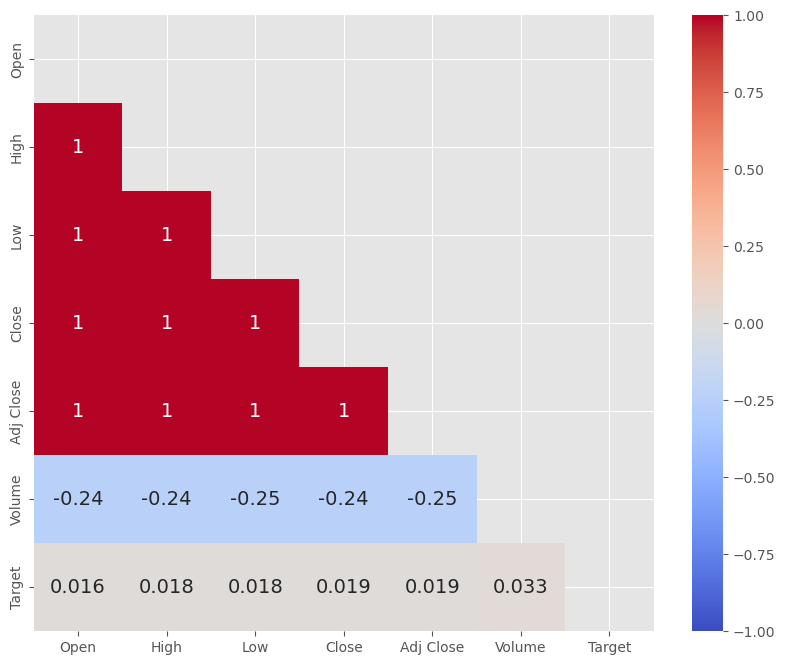

In [126]:
# Check the colinearity

corr_matirx_Logit = X_Logit.corr()
mask_matrix_Logit = np.triu(corr_matirx_Logit)

plt.figure(figsize = (10,8))
sns.heatmap(corr_matirx_Logit, mask=mask_matrix_Logit, cmap='coolwarm', vmin=-1, vmax=1, annot=True, annot_kws={'size': 14})
plt.show()

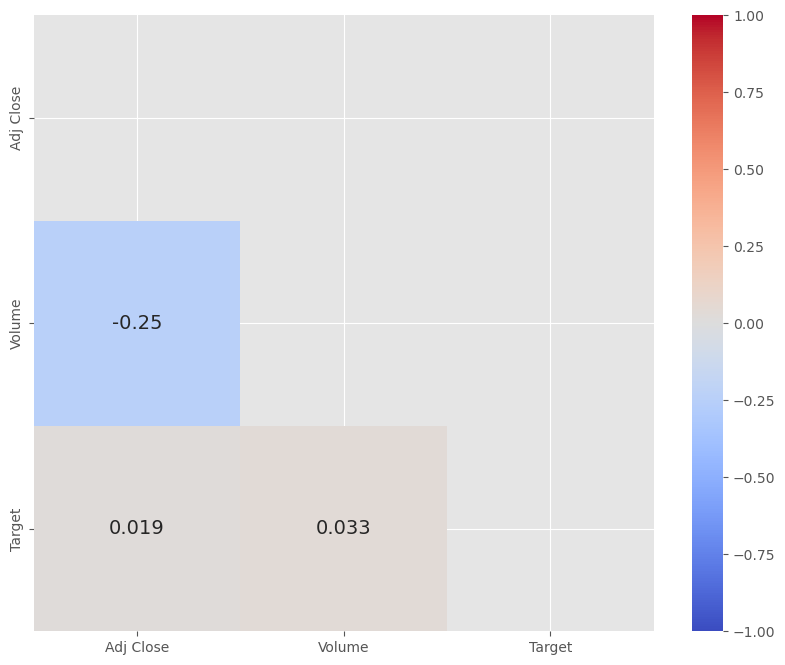

In [130]:
X1_Logit = X_Logit.drop(columns = ['Open', 'Close', 'High', 'Low'])
corr_matirx_Logit1 = X1_Logit.corr()
mask_matrix_Logit1 = np.triu(corr_matirx_Logit1)

plt.figure(figsize = (10,8))
sns.heatmap(corr_matirx_Logit1, mask=mask_matrix_Logit1, annot=True, annot_kws={'size':14}, vmax = 1, vmin=-1, cmap='coolwarm')
plt.show()

In [132]:
# Check the correlation in population:

print(stats.pearsonr(X1_Logit['Volume'], X1_Logit['Target']))
print(stats.pearsonr(X1_Logit['Adj Close'], X1_Logit['Target']))
print(stats.pearsonr(X1_Logit['Adj Close'], X1_Logit['Volume']))

PearsonRResult(statistic=0.032906518327174936, pvalue=3.385671912431069e-05)
PearsonRResult(statistic=0.01886212209433736, pvalue=0.01750251527215144)
PearsonRResult(statistic=-0.2463229598754336, pvalue=5.912360992834337e-218)


P-values are small which means we can reject the null hypothesis. 

In [134]:
# Check the VIF
X1_Logit_withconst = sm.add_constant(X1_Logit)
VIF_df_Logit = [variance_inflation_factor(X1_Logit_withconst, i) for i in range(X1_Logit_withconst.shape[1])]
VIF_df_Logit = pd.DataFrame(data= VIF_df_Logit, columns=['VIF'])
display(VIF_df_Logit)

,VIF
0,2.858930
1,1.065420
2,1.066196
3,1.001861


There is no VIF detected. 

In [136]:
# View the data frame

display(X1_Logit)  # Adj Close, Volume, and Target
display(y_Logit)

,Adj Close,Volume,Target
1980-12-13,0.099058,469033600.0,0
1980-12-14,0.099058,469033600.0,0
1980-12-15,0.093890,175884800.0,0
1980-12-16,0.086998,105728000.0,0
1980-12-17,0.089152,86441600.0,1
...,...,...,...
2024-05-18,189.869995,41282900.0,0
2024-05-19,189.869995,41282900.0,0
2024-05-20,191.039993,44361300.0,1
2024-05-21,192.350006,42309400.0,1


1980-12-13    0
1980-12-14    0
1980-12-15    0
1980-12-16    1
1980-12-17    1
             ..
2024-05-18    0
2024-05-19    1
2024-05-20    1
2024-05-21    0
2024-05-22    0
Name: Target_tomo, Length: 15867, dtype: int32

In [137]:
apple

,Open,High,Low,Close,Adj Close,Volume,Return,Target,Return_tomo,Target_tomo
1980-12-13,0.128348,0.128906,0.128348,0.128348,0.099058,469033600.0,0.000000,0,0.000000,0
1980-12-14,0.128348,0.128906,0.128348,0.128348,0.099058,469033600.0,0.000000,0,-0.052171,0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800.0,-0.052171,0,-0.073398,0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086998,105728000.0,-0.073398,0,0.024751,1
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600.0,0.024751,1,0.028992,1
...,...,...,...,...,...,...,...,...,...,...
2024-05-18,189.509995,190.809998,189.179993,189.869995,189.869995,41282900.0,0.000000,0,0.000000,0
2024-05-19,189.509995,190.809998,189.179993,189.869995,189.869995,41282900.0,0.000000,0,0.006162,1
2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300.0,0.006162,1,0.006857,1
2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400.0,0.006857,1,-0.007538,0


In [138]:
Logit_df = apple.drop(columns=['Open', 'High', 'Low', 'Close', 'Return', 'Return_tomo'])
Logit_df.to_csv(r'C:\Users\12436\Desktop\BrainStation\Capstone project\capstone-Leoyuyuyu\data\Logit_df.csv')